<a href="https://colab.research.google.com/github/ladkrutarth/PDS_Assignment_3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


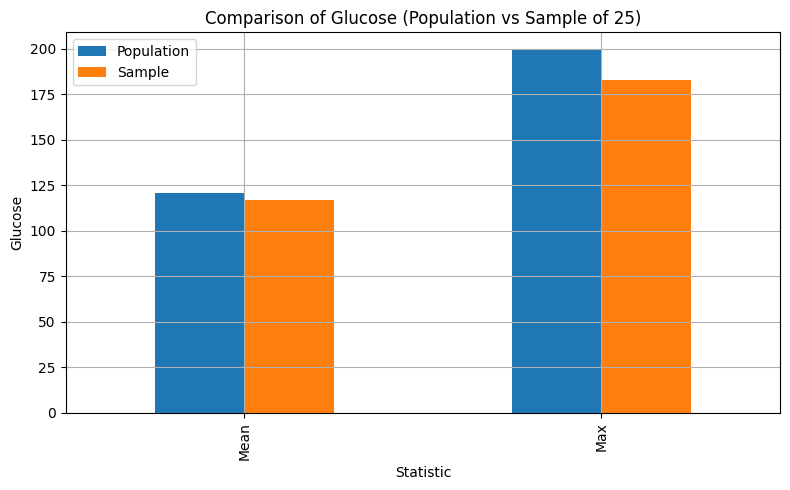

In [22]:
np.random.seed(42)
sample_data = df.sample(n=25, random_state=42)

pop_mean_glucose= df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()
sample_mean_glucose = sample_data['Glucose'].mean()
sample_max_glucose = sample_data['Glucose'].max()

# Plot Glucose comparison
plt.figure(figsize=(8, 5))
glucose_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Max'],
    'Population': [pop_mean_glucose, pop_max_glucose],
    'Sample': [sample_mean_glucose, sample_max_glucose]
})
glucose_stats.set_index("Statistic").plot(kind='bar', ax=plt.gca())
plt.title("Comparison of Glucose (Population vs Sample of 25)")
plt.ylabel("Glucose")
plt.grid(True)
plt.tight_layout()
plt.show()

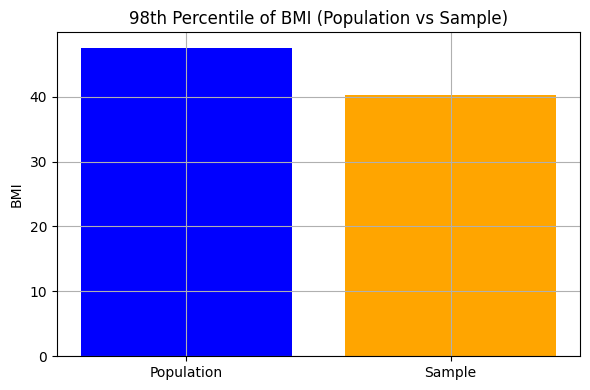

In [24]:
pop_bmi_98 = np.percentile(df['BMI'], 98)
sample_bmi_98 = np.percentile(sample_data['BMI'], 98)

# Plot BMI percentile
plt.figure(figsize=(6, 4))
plt.bar(['Population', 'Sample'], [pop_bmi_98, sample_bmi_98], color=['blue', 'orange'])
plt.title("98th Percentile of BMI (Population vs Sample)")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
plt.show()

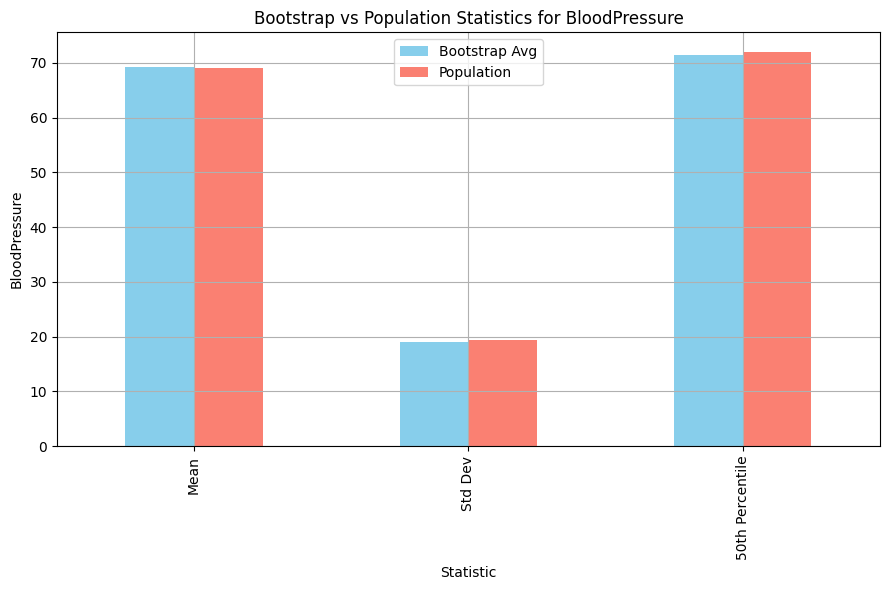

         Statistic  Bootstrap Avg  Population
0             Mean      69.176920   69.105469
1          Std Dev      19.073718   19.355807
2  50th Percentile      71.502000   72.000000


In [25]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_pcts = []

for _ in range(500):
    bootstrap_sample = df.sample(n=150, replace=True)
    bp = bootstrap_sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_pcts.append(np.percentile(bp, 50))  # median

# Population stats for BloodPressure
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std = df['BloodPressure'].std()
pop_bp_pct = np.percentile(df['BloodPressure'], 50)

# Create comparison DataFrame
bootstrap_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Std Dev', '50th Percentile'],
    'Bootstrap Avg': [
        np.mean(bootstrap_means),
        np.mean(bootstrap_stds),
        np.mean(bootstrap_pcts)
    ],
    'Population': [pop_bp_mean, pop_bp_std, pop_bp_pct]
})

# Plot Bootstrap vs Population stats
plt.figure(figsize=(9, 6))
bootstrap_stats.set_index("Statistic").plot(kind='bar', ax=plt.gca(), color=["skyblue", "salmon"])
plt.title("Bootstrap vs Population Statistics for BloodPressure")
plt.ylabel("BloodPressure")
plt.grid(True)
plt.tight_layout()
plt.show()

# Report (You may use this in a markdown or notebook cell)
print(bootstrap_stats)